In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os


In [19]:
base_path = r"C:\Users\DELL\Downloads\archive (1)\6 Emotions for image classification"
train_dir = os.path.join(base_path, "train")
test_dir  = r"C:\Users\DELL\Downloads\archive (1)\6 Emotions for image classification\test"


In [20]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode=None,
    shuffle=False
)


Found 1146 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [21]:
mobilenet = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

mobilenet.trainable = False   # FREEZE pretrained layers


In [22]:
x = mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
history = model.fit(
    train_data,
    epochs=50,
    
)


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 78s 951ms/step - accuracy: 0.2810 - loss: 1.9094
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 840ms/step - accuracy: 0.4346 - loss: 1.5079
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 839ms/step - accuracy: 0.5218 - loss: 1.2956
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 840ms/step - accuracy: 0.5401 - loss: 1.2117
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 837ms/step - accuracy: 0.5716 - loss: 1.1462
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 838ms/step - accuracy: 0.5838 - loss: 1.1165
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 824ms/step - accuracy: 0.6204 - loss: 1.0477
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 858ms/step - accuracy: 0.6152 - loss: 1.0213
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 864ms/step - accuracy: 0.6588 - loss: 0.9355
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 61s 841ms/step - accuracy: 0.6353 - loss: 0.9727
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 819ms/step - accuracy: 0.6510 - loss: 0.9364
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 82

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


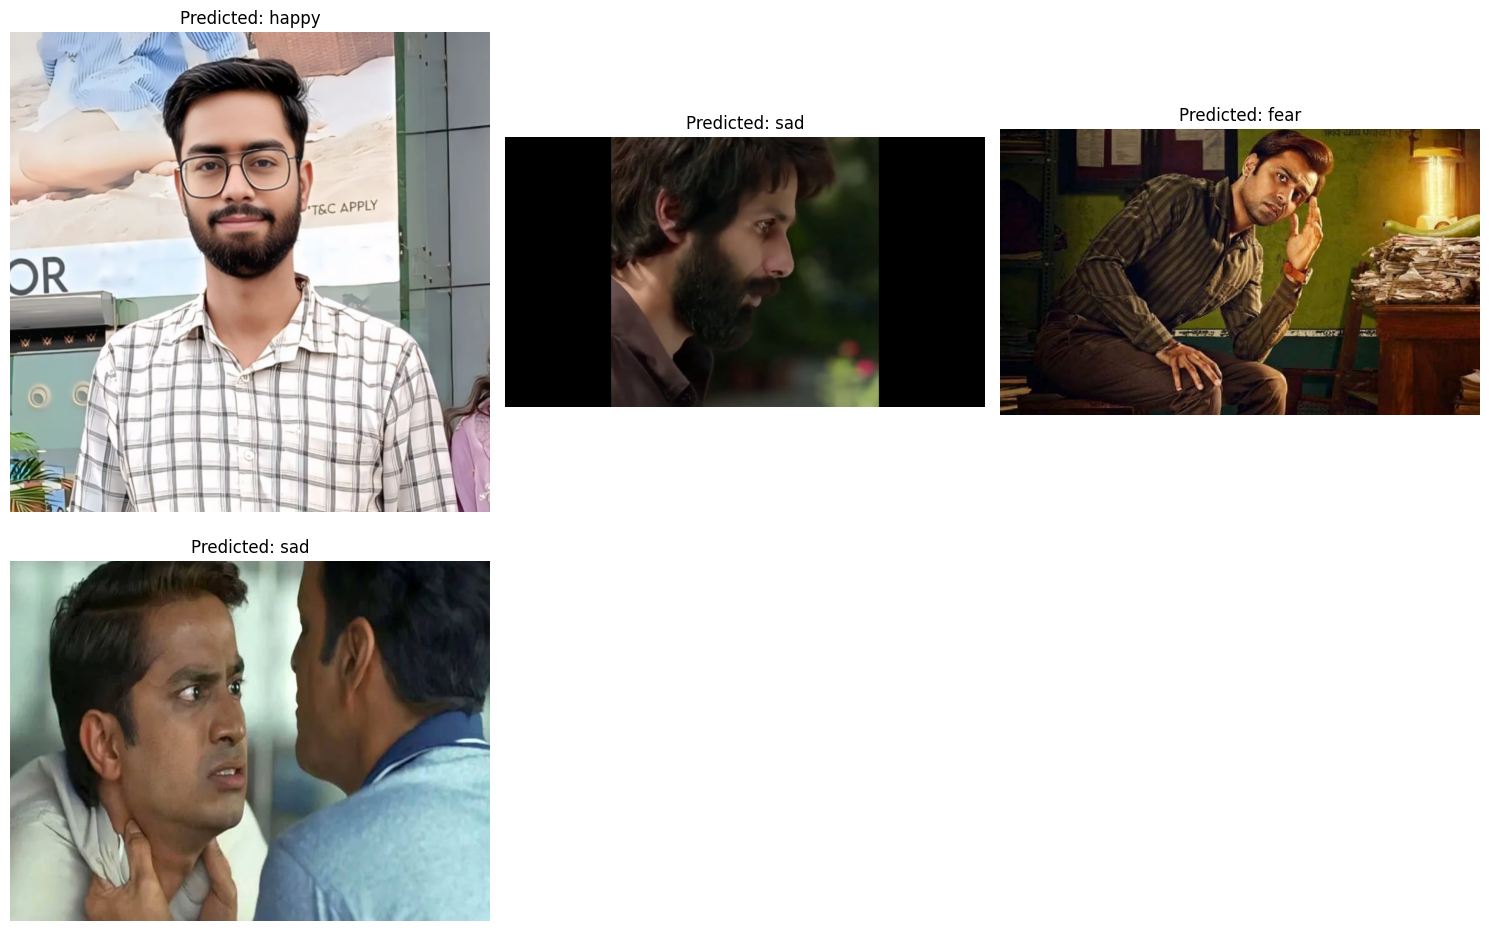

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Add multiple image paths here
img_paths = [
    r"C:\Users\DELL\Downloads\archive (1)\6 Emotions for image classification\test\IMG-20251128-WA0011.jpg",
    r"C:\Users\DELL\Downloads\maxresdefault.jpg",
    r"C:\Users\DELL\Downloads\434390-happy-30th-birthday-2024-05-28t165239738.jfif",
    r"C:\Users\DELL\Downloads\tiwari-1820_061621090122.avif"
     
]

images_array = []

# Preprocess all images
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    images_array.append(img_array)

# Convert list to numpy array
images_array = np.array(images_array)

# Predict all images
preds = model.predict(images_array)

# Get class names
class_names = list(train_data.class_indices.keys())

# Plot results
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(img_paths):
    class_index = np.argmax(preds[i])
    prediction = class_names[class_index]
    
    plt.subplot(2, 3, i + 1)   # fixed for max 6 images; adjust if more
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {prediction}")
    plt.axis("off")

plt.tight_layout()
plt.show()
